In [60]:
%matplotlib inline
import pandas as pd
import numpy as np
import os.path as op
import seaborn as sns
from nilearn import surface
import pingouin

import matplotlib as mpl
mpl.rcParams['font.family'] = 'Helvetica'


bids_folder = '/data2/risk_precision/ds-numrisk/'

In [61]:
neural_results = pd.read_csv(op.join(bids_folder, 'derivatives', 'summary_data', 'neural_results_aug2021.tsv'), sep='\t')
neural_results = neural_results.set_index(['type', 'subject', 'mask'])
neural_results['log(neural precision)'] = np.log(neural_results['neural precision'])


behav = pd.read_csv('~/Downloads/riskPrecision_data.csv').set_index('subject')
behav.index = behav.index.astype(int)

In [62]:
from pandas import IndexSlice as ix_

In [63]:
formiguel = neural_results.loc[ix_['trialwise', :, ['NPC', 'NPC_L', 'NPC_R']], :].unstack('mask')[['neural precision', 'slope']]


formiguel.to_csv('/data2/risk_precision/ds-numrisk/derivatives/summary_data/miguel_aug2021.csv')

In [64]:
df = behav.join(neural_results)

In [65]:
df['slope/intercept'] = df['slope'] / df['intercept']
df['slope2/intercept2'] = df['slope2'] / df['intercept2']
df['log(sd)'] = np.log(df['sd'])
df['log(mutual information)'] = np.log(df['mutual information'])

/Users/gdehol/miniconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [66]:
df = df.xs('NPC_R', 0, 'mask').xs('trialwise', 0, 'type')

/Users/gdehol/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='riskprec_coin', ylabel='Density'>

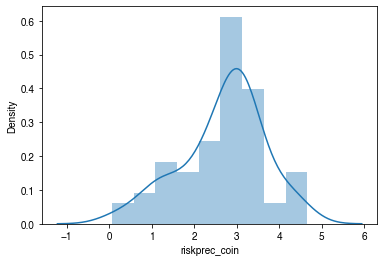

In [132]:
sns.distplot(df['riskprec_coin'])

In [159]:
df['Perceptual precision'] = df['mag_prec']

df['Risk precision (non-symbolic)'] = df['riskprec_coin']
df['Risk precision (symbolic)'] = df['riskprec_sym']

df['log(Risk precision (non-symbolic))'] = np.log(df['riskprec_coin'])
df['log(Risk precision (symbolic))'] = np.log(df['riskprec_sym'])

df['RNP (non-symbolic)'] = df['rnp_coin']
df['RNP (symbolic)'] = df['rnp_sym']

In [160]:


neural_regressors = ['log(neural precision)', 'slope']

behavioral_regressors = ['Perceptual precision', 'Risk precision (non-symbolic)', 
                        'Risk precision (symbolic)', 'RNP (non-symbolic)',
                        'RNP (symbolic)',
                        'log(Risk precision (non-symbolic))',
                        'log(Risk precision (symbolic))']

In [161]:
from itertools import product

# Pearson

In [175]:
rs = []
keys = []

for br, nr in product(behavioral_regressors, neural_regressors):
    rs.append(pingouin.corr(df[br], df[nr], method='pearson').iloc[0])
    keys.append((br, nr))
    
rs = pd.concat(rs, keys=keys, names=['behavior', 'neural'])
rs = rs.unstack()[['r', 'p-val', 'BF10']].rename(columns={'p-val': 'p-val (two-sided)'})
rs.columns.name = 'parameter'
rs['p-val (one-sided)'] = rs['p-val (two-sided)'] / 2.
rs = rs.drop('p-val (two-sided)', 1)
rs = rs.stack().unstack(['neural', 'parameter'])

rs.astype(float).round(3)

<ipython-input-175-3d32d2bc2a46>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  rs = rs.drop('p-val (two-sided)', 1)


neural                             Neural diminishing sensitivity         \
parameter                                                       r   BF10   
behavior                                                                   
Perceptual precision                                       -0.059  0.174   
RNP (non-symbolic)                                         -0.268  1.464   
RNP (symbolic)                                             -0.140  0.283   
Risk precision (non-symbolic)                              -0.213  0.633   
Risk precision (symbolic)                                  -0.180  0.420   
log(Risk precision (non-symbolic))                         -0.354  8.772   
log(Risk precision (symbolic))                             -0.295  2.423   

neural                                               log(neural precision)  \
parameter                          p-val (one-sided)                     r   
behavior                                                                     
Perceptual precision                           0.320                 0.404   
RNP (non-symbolic)                             0.016                 0.258   
RNP (symbolic)                                 0.135                 0.085   
Risk precision (non-symbolic)                  0.045                 0.122   
Risk precision (symbolic)                      0.077                 0.118   
log(Risk precision (non-symbolic))             0.002                 0.190   
log(Risk precision (symbolic))                 0.009                 0.151   

neural                                                        
parameter                             BF10 p-val (one-sided)  
behavior                                                      
Perceptual precision                33.236             0.000  
RNP (non-symbolic)                   1.247             0.020  
RNP (symbolic)                       0.194             0.251  
Risk precision (non-symbolic)        0.244             0.169  
Risk precision (symbolic)            0.238             0.177  
log(Risk precision (non-symbolic))   0.469             0.067  
log(Risk precision (symbolic))       0.311             0.117

# Spearman 

In [163]:
rs = []
keys = []

for br, nr in product(behavioral_regressors, neural_regressors):
    rs.append(pingouin.corr(df[br], df[nr], method='spearman').iloc[0])
    keys.append((br, nr))
    
rs = pd.concat(rs, keys=keys, names=['behavior', 'neural'])
rs = rs.unstack()[['r', 'p-val']].rename(columns={'p-val': 'p-val (two-sided)'})
rs.columns.name = 'parameter'
rs['p-val (one-sided)'] = rs['p-val (two-sided)'] / 2.
rs = rs.drop('p-val (two-sided)', 1)
rs = rs.stack().unstack(['neural', 'parameter'])

rs.astype(float).round(3)

<ipython-input-163-71af85af269f>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  rs = rs.drop('p-val (two-sided)', 1)


neural                             log(neural precision)                    \
parameter                                              r p-val (one-sided)   
behavior                                                                     
Perceptual precision                               0.374             0.001   
RNP (non-symbolic)                                 0.230             0.034   
RNP (symbolic)                                     0.092             0.234   
Risk precision (non-symbolic)                      0.137             0.140   
Risk precision (symbolic)                          0.111             0.192   
log(Risk precision (non-symbolic))                 0.137             0.140   
log(Risk precision (symbolic))                     0.111             0.192   

neural                              slope                    
parameter                               r p-val (one-sided)  
behavior                                                     
Perceptual precision               -0.114             0.186  
RNP (non-symbolic)                 -0.059             0.322  
RNP (symbolic)                     -0.117             0.178  
Risk precision (non-symbolic)      -0.162             0.101  
Risk precision (symbolic)          -0.112             0.189  
log(Risk precision (non-symbolic)) -0.162             0.101  
log(Risk precision (symbolic))     -0.112             0.189

# Trimmed mean

In [164]:
rr = []
keys = []

for br, nr in product(behavioral_regressors, neural_regressors):
    r = sm.RLM(df[br], sm.add_constant(df[[nr]]), M=sm.robust.norms.TrimmedMean()).fit()
    rr.append(pd.Series({'z':r.tvalues[nr], 'p-val':r.pvalues[nr]}))
    keys.append((br, nr))
    
rr = pd.concat(rr, keys=keys, names=['behavior', 'neural']).unstack()
rr = rr.rename(columns={'p-val': 'p-val (two-sided)'})
rr.columns.name = 'parameter'
rr['p-val (one-sided)'] = rr['p-val (two-sided)'] / 2.
rr = rr.drop('p-val (two-sided)', 1)
rr = rr.stack().unstack(['neural', 'parameter'])

<ipython-input-164-2fc3f33ba0c9>:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  rr = rr.drop('p-val (two-sided)', 1)


In [165]:
rr.round(3)

neural                             log(neural precision)                    \
parameter                                              z p-val (one-sided)   
behavior                                                                     
Perceptual precision                               4.671             0.000   
RNP (non-symbolic)                                 1.629             0.052   
RNP (symbolic)                                     0.510             0.305   
Risk precision (non-symbolic)                      2.592             0.005   
Risk precision (symbolic)                          0.934             0.175   
log(Risk precision (non-symbolic))                 1.936             0.026   
log(Risk precision (symbolic))                     0.923             0.178   

neural                              slope                    
parameter                               z p-val (one-sided)  
behavior                                                     
Perceptual precision               -1.566             0.059  
RNP (non-symbolic)                 -2.929             0.002  
RNP (symbolic)                     -1.731             0.042  
Risk precision (non-symbolic)      -6.351             0.000  
Risk precision (symbolic)          -1.441             0.075  
log(Risk precision (non-symbolic)) -4.750             0.000  
log(Risk precision (symbolic))     -0.643             0.260

In [166]:
rr = []
keys = []

for br, nr in product(behavioral_regressors, neural_regressors):
    r = sm.RLM(df[br], sm.add_constant(df[[nr]]), M=sm.robust.norms.HuberT()).fit()
    rr.append(pd.Series({'z':r.tvalues[nr], 'p-val':r.pvalues[nr]}))
    keys.append((br, nr))
    
rr = pd.concat(rr, keys=keys, names=['behavior', 'neural']).unstack()
rr = rr.rename(columns={'p-val': 'p-val (two-sided)'})
rr.columns.name = 'parameter'
rr['p-val (one-sided)'] = rr['p-val (two-sided)'] / 2.
rr = rr.drop('p-val (two-sided)', 1)
rr = rr.stack().unstack(['neural', 'parameter'])
rr.round(3)

<ipython-input-166-b2f99a2dd691>:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  rr = rr.drop('p-val (two-sided)', 1)


neural                             log(neural precision)                    \
parameter                                              z p-val (one-sided)   
behavior                                                                     
Perceptual precision                               3.306             0.000   
RNP (non-symbolic)                                 2.052             0.020   
RNP (symbolic)                                     0.776             0.219   
Risk precision (non-symbolic)                      1.185             0.118   
Risk precision (symbolic)                          0.896             0.185   
log(Risk precision (non-symbolic))                 1.174             0.120   
log(Risk precision (symbolic))                     1.130             0.129   

neural                              slope                    
parameter                               z p-val (one-sided)  
behavior                                                     
Perceptual precision               -0.528             0.299  
RNP (non-symbolic)                 -2.068             0.019  
RNP (symbolic)                     -1.228             0.110  
Risk precision (non-symbolic)      -2.376             0.009  
Risk precision (symbolic)          -1.482             0.069  
log(Risk precision (non-symbolic)) -2.580             0.005  
log(Risk precision (symbolic))     -1.717             0.043

In [167]:
sns.regplot?

In [168]:
df['Neural diminishing sensitivity'] = df['slope']

neural_regressors = ['log(neural precision)', 'Neural diminishing sensitivity']

In [169]:
tmp = []
keys = []

for br, nr in product(behavioral_regressors, neural_regressors):    
    tmp.append(pd.DataFrame({'x':df[br], 'y':df[nr]}))
    keys.append((br, nr))
    
tmp = pd.concat(tmp, keys=keys, names=['behavior', 'neural'])

In [170]:
sns.set_context('talk')

In [171]:
import matplotlib.pyplot as plt

/Users/gdehol/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/gdehol/miniconda3/lib/python3.9/site-packages/seaborn/regression.py:592: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
/Users/gdehol/miniconda3/lib/python3.9/site-packages/seaborn/regression.py:592: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


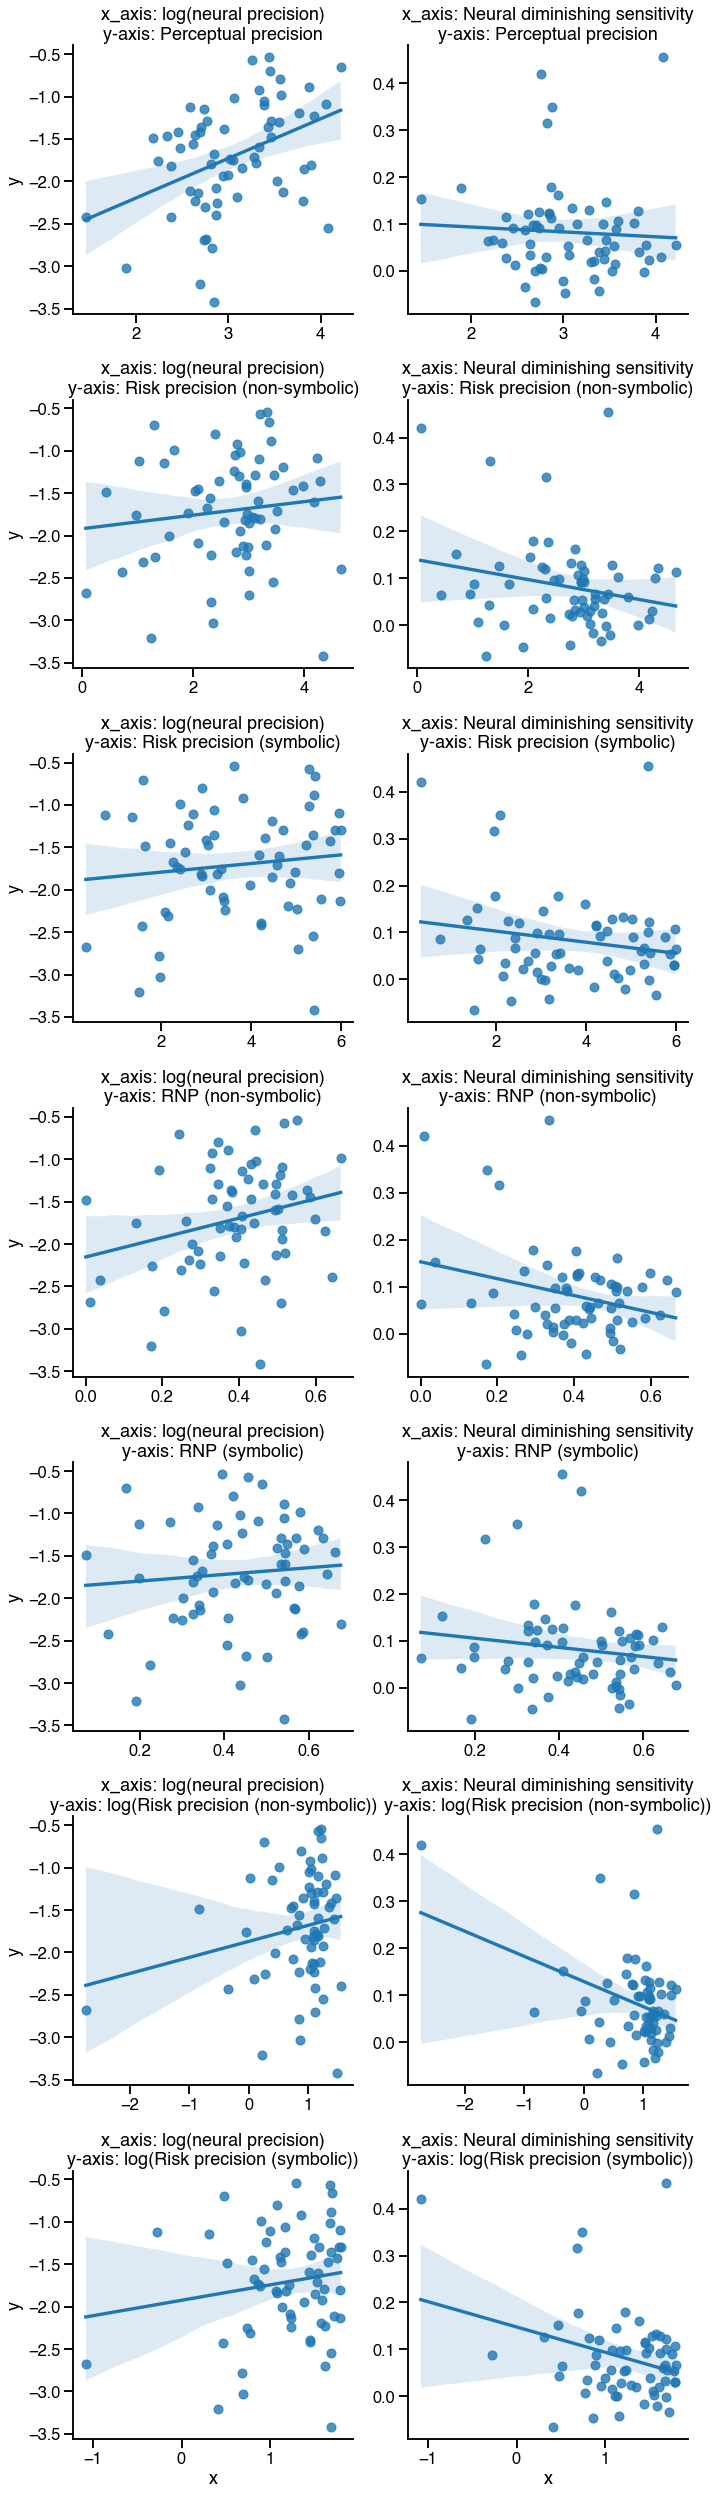

In [172]:
fac = sns.lmplot('x', 'y', tmp.reset_index(), fit_reg=True, row='behavior', col='neural',
          sharex=False, sharey=False)


fac.set_titles('x_axis: {col_name}\ny-axis: {row_name}')
plt.tight_layout()

/Users/gdehol/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/gdehol/miniconda3/lib/python3.9/site-packages/seaborn/regression.py:592: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
/Users/gdehol/miniconda3/lib/python3.9/site-packages/seaborn/regression.py:592: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


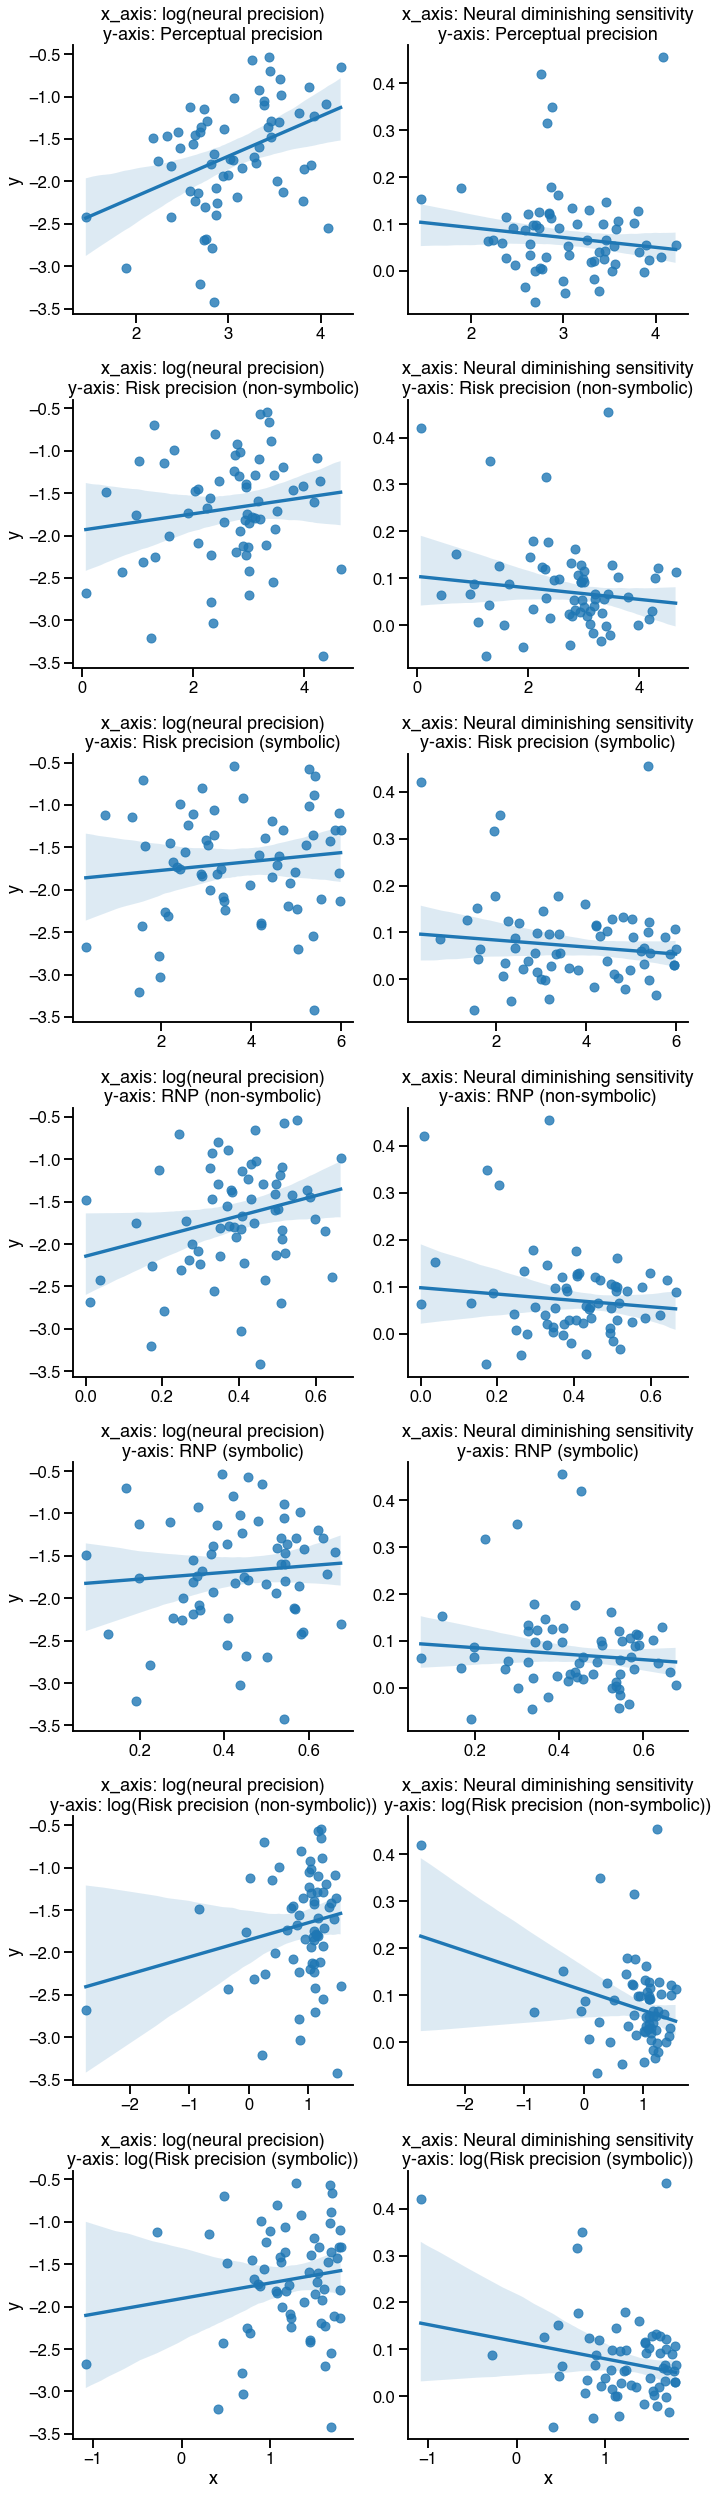

In [173]:
fac = sns.lmplot('x', 'y', tmp.reset_index(), fit_reg=True, row='behavior', col='neural',
          sharex=False, sharey=False, robust=True)


fac.set_titles('x_axis: {col_name}\ny-axis: {row_name}')
plt.tight_layout()